# DESAFIO CIENTISTA DE DADOS
## INDICIUM / LIGHTHOUSE

###### Autora: Aline de Castro Santos
###### Data: Julho de 2024

# **1. INTRODUÇÃO**

## 1.2. Dicionário dos dados

A base de dados de treinamento contém 15 colunas. Seus nomes e descrição das colunas são:

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- ertificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


# **2. BIBLIOTECAS NECESSÁRIAS**

In [38]:
# Importando as bibliotecas necessárias

import pandas as pd  # Para manipulação e análise de dados estruturados em tabelas
import numpy as np  # Para realizar operações matemáticas e manipular arrays multidimensionais
import matplotlib.pyplot as plt  # Para criação de gráficos estáticos, animados e interativos em 2D
import seaborn as sns  # Para criação de gráficos estatísticos mais atraentes e informativos baseados em Matplotlib
import scipy.stats as stats  # Para realizar cálculos estatísticos e operações matemáticas avançadas
import plotly.express as px  # Para criação de gráficos interativos de alto nível
import plotly.subplots as sp  # Para criação de subplots em gráficos Plotly
import plotly.graph_objs as go  # Para criação de gráficos Plotly de baixo nível com mais controle sobre o design
import statsmodels.formula.api as smf  # Para criação de modelos estatísticos e execução de testes estatísticos usando fórmulas
import statsmodels.api as sm  # Para acesso a funções estatísticas completas e modelos estatísticos
from wordcloud import WordCloud  # Para visualização de dados de texto através de nuvens de palavras
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression  # Para realizar regressão linear e modelar relações entre variáveis
from sklearn.metrics import mean_squared_error  # Para calcular o erro quadrático médio, uma métrica de avaliação de modelo
import pickle  # Para serializar e desserializar objetos Python, permitindo que os objetos sejam salvos e carregados
from sklearn.ensemble import RandomForestRegressor # Para realizar Random Forest, um método de aprendizado de máquina
from sklearn.impute import SimpleImputer  # Para preencher valores ausentes nos dados
from sklearn.model_selection import GridSearchCV # Para ajustar os hiperparâmetros
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import warnings

# Ignorar os avisos de desempenho do pandas
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# Configuração para exibir gráficos diretamente no notebook
%matplotlib inline

# **3. CARREGANDO A BASE DE DADOS**

In [66]:
# Carregando os dados
df = pd.read_csv('desafio_indicium_imdb.csv')

# Visualização das primeiras cinco linhas do DataFrame
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# **4. ANÁLISE EXPLORATÓRIA DOS DADOS**
## 4.1 Descrição dos dados

In [3]:
# Dimensionalidade do DataFrame (número de linhas, número de colunas)
df.shape

(999, 16)

In [4]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
# Descrição estatística das variáveis numéricas
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [40]:
# Número de valores nulos em cada coluna
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## 4.1. Tratamento dos dados nulos
- Coluna “Certificate” (Classificação Etária): <br>
A coluna “Certificate” indica a classificação etária do filme (por exemplo, “A”, “UA”, “U”, etc.). É uma variável categórica importante para entender o público-alvo do filme.<br>
Foi preenchido os valores nulos com a moda (valor mais frequente) dessa coluna, pois a classificação mais comum provavelmente representa a tendência geral dos filmes no dataset.<br>
 <br>

In [67]:
# Preenchendo valores nulos na coluna "Certificate" com a moda
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)

- Coluna “Meta_score” (Média Ponderada de Críticas): <br>
“Meta_score” é uma métrica que reflete a qualidade do filme com base em avaliações de críticos. É uma variável numérica relevante para entender o desempenho do filme. <br>
Os valores nulos foram preenchidos com a média dos valores não nulos. Isso ajuda a manter a consistência e a evitar distorções nos dados. A média é uma estimativa razoável para preencher esses valores ausentes. <br>
 <br>


In [68]:
# Preenchendo valores nulos na coluna "Meta_score" com a média
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

- Coluna “Gross” (Faturamento): <br>
O faturamento é uma métrica crucial para avaliar o sucesso financeiro de um filme. Queremos entender como essa variável se relaciona com outras características. <br>
A coluna “Gross” foi convertida para valores numéricos (removendo vírgulas) e os valores nulos foram preenchidos com a média do faturamento. Isso permite manter a integridade dos dados e usar uma estimativa realista para os valores ausentes.

In [69]:
# Convertendo a coluna "Gross" para valores numéricos (removendo vírgulas e convertendo para float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Preenchendo valores nulos na coluna "Gross" com a média do faturamento
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

In [44]:
# Verificando se os valores nulos foram tratados
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64



## **4.2**. Tratamento dos tipos de dados


In [11]:
# Verificando os tipos de dados de cada coluna
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

* Released_Year (Ano de lançamento):<br>

Tipo original: object (string).<br>
Tipo desejado: int ou float.<br>
Motivo: Os anos de lançamento são valores numéricos que representam um ponto no tempo. Para realizar operações numéricas, ordenações ou filtrar dados por ano, é necessário que essa coluna esteja no formato numérico.




In [70]:
# Convertendo a coluna 'Released_Year' para int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

*Runtime (Tempo de duração):<br>

Tipo original: object (string).<br>
Tipo desejado: float.<br>
Motivo: A duração do filme está representada como uma string, incluindo a unidade "min". Para realizar análises quantitativas, como calcular a média de duração dos filmes, é necessário extrair apenas o valor numérico e convertê-lo para um tipo numérico.




In [71]:
# Extraindo apenas o número de minutos da coluna 'Runtime' e converter para int
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

* Gross (Faturamento): <br>

Tipo original: object (string). <br>
Tipo desejado: float.<br>
Motivo: O faturamento está representado como uma string que inclui símbolos de pontuação, como vírgulas. Para realizar operações numéricas, como calcular a soma ou a média do faturamento, é necessário remover os símbolos de pontuação e converter para um tipo numérico.
obs.: Essa coluna já havia sido convertida no passo anterior, ao tratar dados nulos

In [14]:
# Verificando novamente os tipos de dados após o tratamento
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## 4.3. Visualização da distribuição dos dados

### 4.3.1. Histograma para Nota do IMDB (IMDB_Rating)





In [16]:
# Histograma para IMDB_Rating
fig_imdb = px.histogram(df, x='IMDB_Rating', nbins=20, title='Distribuição da Nota do IMDB')
fig_imdb.show()

**ANÁLISE:** O histograma mostra uma distribuição de notas do IMDb concentradas principalmente entre 7.6 e 8.6, com a frequência mais alta na marca de 7.7. Isso reforça a observação de que um número significativo de filmes é classificado como acima da média, mas não muitos recebem notas muito altas, que estariam mais próximas de 10. <br>

Essa consistência na distribuição sugere que o conjunto de dados analisado tem uma dispersão relativamente padrão de notas de filmes, com a maioria dos filmes sendo considerada boa, mas não excepcional, pelos usuários do IMDb.

### 4.3.2. Histograma para Meta_score (Média ponderada de todas as críticas )

In [17]:
# Histograma para Meta_score
fig = px.histogram(df, x='Meta_score', title='Distribution of Meta Scores')
fig.show()

**ANÁLISE:** O aspecto mais interessante deste histograma é o pico proeminente em torno da pontuação de 76 a 77.99, onde há um aumento significativo na contagem em comparação com outras faixas de pontuação. Isso sugere que um grande número de entradas recebeu um Meta Score em torno desse valor. O resto da distribuição parece relativamente normal, com menos contagens nas extremidades inferior e superior da faixa de pontuação. <br>


### 4.3.3. Histograma para No_of_Votes (Número de Votos)

In [18]:
# Histograma para No_of_Votes
fig = px.histogram(df, x='No_of_Votes', title='Distribution of Number of Votes')
fig.show()


**ANÁLISE:** O histograma de distribuição do número de votos mostra uma distribuição inclinada para a direita, com a maioria dos dados concentrados no lado esquerdo, indicando que há mais instâncias com menos votos e menos instâncias com um grande número de votos. Isso sugere que, a maioria dos filmes recebe apenas um pequeno número de votos, enquanto apenas alguns recebem muitos votos.


### 4.3.4. Histograma para Gross (Faturamento)

In [19]:
# Histogram for Gross
fig = px.histogram(df, x='Gross', title='Distribution of Gross Revenue')
fig.show()

**ANÁLISE:** A barra mais alta localizada no lado esquerdo do histograma, indica que a maioria dos pontos de dados cai dentro da faixa de receita bruta mais baixa (0-100M). À medida que a receita bruta aumenta, a frequência diminui significativamente, mostrando menos ocorrências em faixas de receita bruta mais altas.



### 4.3.5. Histograma para Genre (Gênero)




In [20]:
# Contar a frequência de cada gênero e ordenar do maior para o menor
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da série ordenada
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Criar o gráfico de barras com as barras ordenadas
fig_genre = px.bar(genre_df, x='Genre', y='Count', title='Frequência dos Gêneros')
fig_genre.update_layout(xaxis={'categoryorder':'total descending'})
fig_genre.show()

**ANÁLISE:** Observa-se que o primeiro gênero, DRAMA, possui uma contagem significativamente maior (84) do que os outros, indicando uma frequência muito mais alta. Os outros gêneros mostram uma diminuição progressiva na contagem, sugerindo que há menos itens pertencentes a esses gêneros.

Os gêneros listados incluem uma variedade de combinações como "Adventure, Mystery, Thriller", "Drama, Musical", e "Crime, Drama, Sci-Fi", entre outros. A distribuição sugere que DRAMA é o gênero mais popular, enquanto os outros têm uma presença mais moderada ou baixa.



### 4.3.6. Histograma para Certificate (frequência de classificação etária)


In [21]:
# Contar a frequência de cada classificação etária e ordenar do maior para o menor
certificate_counts = df['Certificate'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da série ordenada
certificate_df = pd.DataFrame({'Certificate': certificate_counts.index, 'Count': certificate_counts.values})

# Criar o gráfico de barras com as barras ordenadas
fig_certificate = px.bar(certificate_df, x='Certificate', y='Count', title='Frequência das Classificações Etárias')
fig_certificate.update_layout(xaxis={'categoryorder':'total descending'})
fig_certificate.show()

**ANÁLISE**: A categoria ‘U’ tem a maior contagem de frequência, com 335, seguida pelas  ‘A’, ‘UA’, e ‘R’, que têm contagens progressivamente menores, variando de 196 a 146. As categorias de ‘PG-13’ a ‘Approved’ têm frequências relativamente baixas em comparação com as categorias iniciais. Por fim, tanto ‘TMA-14’, ‘16’, ‘TV-MA’, ‘Unrated’, ‘U/A’, ‘GP’ e ‘TV-PG’ têm as menores frequências neste gráfico.

### 4.3.7. Boxplot para Faturamento e Tempo de Duração

In [22]:
fig_boxplot = px.box(df, y=['Gross', 'Runtime'], title='Boxplot de Faturamento e Tempo de Duração')
fig_boxplot.show()


**ANÁLISE:** O boxplot para 'Gross' mostra uma ampla gama de valores com vários outliers acima do bigode superior, indicando que existem alguns valores brutos significativamente mais altos que o resto. A mediana está mais próxima do quartil inferior, sugerindo uma distribuição inclinada para valores brutos mais baixos. <br>
Por outro lado, o boxplot de 'Runtime' é muito mais compacto, sem outliers visíveis, e sua mediana está centralizada dentro da caixa, indicando uma distribuição mais simétrica dos valores de duração.




### 4.3.8. Scatterplot entre Nota do IMDB e Faturamento:

In [23]:
fig_scatter = px.scatter(df, x='Gross', y='IMDB_Rating', title='Relação entre Nota do IMDB e Faturamento')
fig_scatter.show()


**ANÁLISE:** O gráfico mostra pontos individuais que representam diferentes filmes, com sua posição determinada pela classificação do IMDB e pelo faturamento bruto. Há uma concentração de pontos entre a faixa de classificação de 7.6 a 8.1 no eixo vertical, e estes estão espalhados por uma ampla gama de receitas brutas no eixo horizontal. Existem menos pontos com classificações mais altas do IMDB acima de 8.4, e estes também abrangem várias receitas brutas, mas não mostram uma tendência ou correlação clara entre a classificação do IMDB e a receita bruta com base nesta visualização. <br>

Essa imagem é interessante ou relevante, pois tenta visualizar qualquer relação potencial entre o sucesso crítico dos filmes, refletido por suas classificações no IMDB, e seu sucesso comercial indicado por suas receitas (faturamento). No entanto, não parece haver uma correlação visível forte entre classificações mais altas e maiores receitas, sugerindo que outros fatores podem influenciar o sucesso financeiro de um filme além de seu aclamação crítica.

### 4.3.9. Boxplots para Meta Scores (Média ponderada das críticas), Number of Votes (Número de votos) e Gross (Faturamento)

In [24]:
# Criando subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Meta Scores', 'Number of Votes', 'Gross'))

# Adiconando boxplots aos subplots
fig.add_trace(go.Box(y=df['Meta_score'], name='Meta Score'), row=1, col=1)
fig.add_trace(go.Box(y=df['No_of_Votes'], name='Number of Votes'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gross'], name='Gross Revenue'), row=1, col=3)

# Imprimeindo os boxplots
fig.update_layout(title_text='Boxplots para Meta Scores (Média ponderada das críticas), Number of Votes (Número de votos) e Gross (Faturamento)', showlegend=False)
fig.show()


**ANÁLISE:** Com base nos boxplots apresentados, tira-se as seguintes conclusões:

1. **Meta Scores (Média ponderada das críticas):**
   - A maioria dos filmes tem uma avaliação próxima à mediana, que está em torno de 70.
   - Existem alguns filmes com notas muito baixas (outliers abaixo do limite inferior), indicando que nem todos os filmes são bem recebidos pela crítica.
   - A faixa interquartil (IQR) sugere que a maioria dos filmes está concentrada entre 60 e 80.

2. **Número de Votos:**
   - A mediana está abaixo de 1 milhão de votos, indicando que a maioria dos filmes não recebeu uma quantidade significativa de votos.
   - No entanto, há vários filmes com um número excepcionalmente alto de votos (outliers acima do limite superior).
   - Isso sugere que alguns filmes atraem uma base de fãs muito grande, enquanto outros não.

3. **Faturamento (Gross):**
   - A mediana do faturamento está em torno de 0,2 bilhão.
   - A IQR indica que a maioria dos filmes tem um faturamento entre 0,05 bilhão e 0,25 bilhão.
   - Alguns filmes têm faturamentos extremamente altos (outliers acima do limite superior), possivelmente devido a grandes sucessos de bilheteria.



## 4.4. Tratamento de Outliers
> Em setores onde grandes variações são comuns, como na indústria do cinema, a presença de outliers é frequentemente uma indicação de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos notáveis, ambos essenciais para uma compreensão completa do desempenho e das tendências no setor cinematográfico. Portanto, ao não tratar ou remover esses outliers, garantimos que a análise e os modelos preditivos mantenham a integridade e a representatividade dos dados.


### Justificativa para o Não Tratamento de Outliers

Em setores onde grandes variações são comuns, como na indústria do cinema, a presença de outliers é frequentemente uma indicação de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos notáveis, ambos essenciais para uma compreensão completa do desempenho e das tendências no setor cinematográfico. Portanto, ao não tratar ou remover esses outliers, garantimos que a análise e os modelos preditivos mantenham a integridade e a representatividade dos dados. Aqui estão algumas razões específicas para não tratar os outliers nesta base de dados:

1. **Representatividade dos Dados**:
   - **Filmes de Sucesso**: Filmes que alcançaram grande sucesso em termos de bilheteria, número de votos ou altas notas de críticos e do público são importantes para a análise. Remover esses outliers pode levar a uma sub-representação de filmes que definem tendências ou que são marcos na indústria.
   - **Fracassos Significativos**: Da mesma forma, filmes que tiveram desempenho excepcionalmente ruim também fornecem insights valiosos sobre os fatores que podem levar ao fracasso.

2. **Variação Intrínseca da Indústria**:
   - A indústria cinematográfica é caracterizada por uma grande variação no desempenho dos filmes. Essa variação é esperada e natural, refletindo diversos fatores como orçamento, marketing, elenco, crítica e aceitação do público. Ao manter os outliers, preservamos a complexidade e a variabilidade inerente ao setor.

3. **Importância para Modelos Preditivos**:
   - **Modelos de Regressão**: Em um modelo de regressão, outliers podem ajudar a capturar extremos e a ajustar o modelo para que ele possa fazer previsões mais precisas em uma faixa mais ampla de valores.
   - **Modelos de Classificação**: Para problemas de classificação, os outliers podem ser cruciais para identificar classes minoritárias ou comportamentos excepcionais.

4. **Insights de Negócios**:
   - Filmes que se destacam podem proporcionar insights valiosos sobre o que contribui para um sucesso inesperado ou um fracasso. Isso pode informar decisões estratégicas em produção, marketing e distribuição.

5. **Equidade e Inclusão**:
   - Remover outliers pode inadvertidamente introduzir vieses, especialmente se esses outliers representam filmes de nichos ou gêneros específicos que são sub-representados na amostra. Manter todos os dados ajuda a garantir que todas as vozes e experiências sejam consideradas.

### Exemplos Concretos
- **"Avengers: Endgame"**: Com receitas de bilheteria extraordinariamente altas, este filme é um outlier que demonstra o potencial de receitas na indústria cinematográfica moderna.
- **"The Room"**: Considerado um dos piores filmes já feitos, seu desempenho peculiar fornece insights sobre filmes de culto e fracassos notáveis.

### Conclusão
> Portanto, ao não tratar os outliers na base de dados, asseguramos que todas as nuances e variações significativas da indústria cinematográfica sejam capturadas. Isso não só melhora a precisão dos modelos preditivos, mas também fornece uma visão mais completa e informada do setor, permitindo decisões estratégicas mais acertadas e uma compreensão mais profunda das dinâmicas do mercado cinematográfico.

# **5. HIPÓTESES DE NEGÓCIOS**




## 5.1.   Qual filme você recomendaria para uma pessoa que você não conhece?




Ao indicar um filme, é crucial considerar o gosto pessoal do indivíduo. Se a pessoa possui um gênero favorito, obras aclamadas dentro dessa categoria serão sugeridas. <br>

No entanto, se a pessoa não demonstra uma preferência específica por gêneros, explorar filmes com altas avaliações pode ser uma ótima alternativa. Afinal, quanto mais bem avaliado um filme for, maior a probabilidade de agrado do público em geral. Essa estratégia aumenta as chances de encontrar uma obra que agrade o espectador, mesmo que ele ainda não tenha um gênero favorito definido.

In [25]:
# Filtrando os filmes com avaliação maior que 8,5
filmes_alta_avaliacao = df[df['IMDB_Rating'] > 8.5]

# Ordenando os filmes pela nota do IMDB em ordem decrescente
filmes_ordenados = filmes_alta_avaliacao.sort_values(by='IMDB_Rating', ascending=False)

# Exibindo os filmes ordenados com suas respectivas notas
print("Filmes com avaliação maior que 8,5 que serão indicados a uma pessoa desconhecida:")
for index, row in filmes_ordenados.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Filmes com avaliação maior que 8,5 que serão indicados a uma pessoa desconhecida:
The Godfather - Nota IMDB: 9.2
The Godfather: Part II - Nota IMDB: 9.0
12 Angry Men - Nota IMDB: 9.0
The Dark Knight - Nota IMDB: 9.0
The Lord of the Rings: The Return of the King - Nota IMDB: 8.9
Pulp Fiction - Nota IMDB: 8.9
Schindler's List - Nota IMDB: 8.9
Inception - Nota IMDB: 8.8
Fight Club - Nota IMDB: 8.8
The Lord of the Rings: The Fellowship of the Ring - Nota IMDB: 8.8
Forrest Gump - Nota IMDB: 8.8
Il buono, il brutto, il cattivo - Nota IMDB: 8.8
Goodfellas - Nota IMDB: 8.7
Star Wars: Episode V - The Empire Strikes Back - Nota IMDB: 8.7
One Flew Over the Cuckoo's Nest - Nota IMDB: 8.7
The Matrix - Nota IMDB: 8.7
The Lord of the Rings: The Two Towers - Nota IMDB: 8.7
The Green Mile - Nota IMDB: 8.6
Shichinin no samurai - Nota IMDB: 8.6
Seppuku - Nota IMDB: 8.6
Star Wars - Nota IMDB: 8.6
The Silence of the Lambs - Nota IMDB: 8.6
Se7en - Nota IMDB: 8.6
La vita è bella - Nota IMDB: 8.6
Saving Priva

Caso a pessoa em questão tenha um gênero de filme favorito, a indicação seria escolher o filme ou os filmes mais bem avaliados de acordo com o gênero:

In [26]:
# Obtendo os valores únicos na coluna 'Genre' (gênero)
valores_unicos_coluna1 = df['Genre'].unique()

# Ordenando os valores em ordem alfabética
valores_unicos_coluna1.sort()

# Exibindo os valores únicos ordenados por ordem alfabética indicando os gêneros de filmes possíveis:
print(f"Gêneros dos filmes: {valores_unicos_coluna1}")

Gêneros dos filmes: ['Action, Adventure' 'Action, Adventure, Biography'
 'Action, Adventure, Comedy' 'Action, Adventure, Crime'
 'Action, Adventure, Drama' 'Action, Adventure, Family'
 'Action, Adventure, Fantasy' 'Action, Adventure, History'
 'Action, Adventure, Horror' 'Action, Adventure, Mystery'
 'Action, Adventure, Romance' 'Action, Adventure, Sci-Fi'
 'Action, Adventure, Thriller' 'Action, Adventure, War'
 'Action, Adventure, Western' 'Action, Biography, Crime'
 'Action, Biography, Drama' 'Action, Comedy, Crime'
 'Action, Comedy, Fantasy' 'Action, Comedy, Mystery'
 'Action, Comedy, Romance' 'Action, Crime, Comedy' 'Action, Crime, Drama'
 'Action, Crime, Mystery' 'Action, Crime, Thriller' 'Action, Drama'
 'Action, Drama, History' 'Action, Drama, Mystery' 'Action, Drama, Sci-Fi'
 'Action, Drama, Sport' 'Action, Drama, Thriller' 'Action, Drama, War'
 'Action, Drama, Western' 'Action, Mystery, Thriller' 'Action, Sci-Fi'
 'Action, Sci-Fi, Thriller' 'Action, Thriller'
 'Adventure, Biog

In [27]:
# Solicitando ao usuário o gênero favorito
genero_favorito = input("Digite o seu gênero de filme favorito: ")

# Filtrando os filmes pelo gênero favorito
filmes_por_genero = df[df['Genre'] == genero_favorito]

# Encontrando a maior avaliação no IMDB para o gênero selecionado
maior_avaliacao = filmes_por_genero['IMDB_Rating'].max()

# Filtrando os filmes que têm a maior avaliação no IMDB
filmes_maior_avaliacao = filmes_por_genero[filmes_por_genero['IMDB_Rating'] == maior_avaliacao][['Series_Title', 'IMDB_Rating']]

# Listando os filmes com a maior avaliação de acordo com o gênero de filme escolhido
print(f"Os filmes com a maior avaliação no IMDB no gênero '{genero_favorito}' são:")
for index, row in filmes_maior_avaliacao.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Digite o seu gênero de filme favorito: Crime, Drama
Os filmes com a maior avaliação no IMDB no gênero 'Crime, Drama' são:
The Godfather - Nota IMDB: 9.2


Assim, se, por exemplo, o gênero favorito da pessoa for 'Crime, Drama', o filme indicado seria: The Godfather, que tem uma excelente avaliação de 9.2 e é um clássico atemporal que se destaca por sua história envolvente, personagens memoráveis, direção impecável e reflexões profundas. Considerado por muitos o melhor filme de todos os tempos, é uma obra obrigatória para qualquer cinéfilo que busca uma experiência cinematográfica enriquecedora e marcante.

## 5.2.   Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?



In [28]:
# Selecionando apenas as colunas numéricas para a matriz de correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
correlation_matrix_img = numeric_df.corr()

# Gerando o mapa de calor
fig = px.imshow(correlation_matrix_img, color_continuous_scale='viridis', title='Matriz de Correlação')

# Mostrar a figura
fig.show()

In [29]:
# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correlação
correlation_matrix

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Unnamed: 0,1.000000,0.048169,-0.237519,-0.946472,-0.242474,-0.373076,-0.063324
Released_Year,0.048169,1.000000,0.165765,-0.133257,-0.289287,0.246005,0.192868
Runtime,-0.237519,0.165765,1.000000,0.242751,-0.027926,0.172483,0.124919
IMDB_Rating,-0.946472,-0.133257,0.242751,1.000000,0.256122,0.479308,0.092968
Meta_score,-0.242474,-0.289287,-0.027926,0.256122,1.000000,-0.019238,-0.030809
No_of_Votes,-0.373076,0.246005,0.172483,0.479308,-0.019238,1.000000,0.563484
Gross,-0.063324,0.192868,0.124919,0.092968,-0.030809,0.563484,1.000000


### 5.2.1. Principais Percepções:

1. **Correlação entre `IMDB_Rating` e `No_of_Votes` (0.479308)**:
   - Existe uma correlação moderada positiva entre a avaliação do IMDB e o número de votos. Isso sugere que filmes bem avaliados tendem a receber mais votos, ou vice-versa.

2. **Correlação entre `No_of_Votes` e `Gross` (0.563484)**:
   - Existe uma correlação moderada positiva entre o número de votos e o faturamento. Filmes que recebem mais votos tendem a ter maior faturamento. Isso pode ser devido à popularidade: filmes populares têm mais espectadores e, portanto, maior receita.

3. **Correlação entre `IMDB_Rating` e `Meta_score` (0.256122)**:
   - Existe uma correlação positiva fraca entre a avaliação do IMDB e a pontuação Meta. Isso indica que, embora haja alguma relação, não é muito forte, sugerindo que críticos e público podem ter opiniões divergentes sobre filmes.

4. **Correlação negativa entre `IMDB_Rating` e `Unnamed: 0` (-0.946472)**:
   - Uma forte correlação negativa entre `Unnamed: 0` e `IMDB_Rating` não é intuitiva e pode sugerir que `Unnamed: 0` (talvez uma coluna de índice) tenha alguma relação artificial ou não significativa com as avaliações do IMDB. Isso deve ser investigado ou ignorado se for um índice.

5. **Correlação entre `Released_Year` e `No_of_Votes` (0.246005)**:
   - Há uma correlação fraca positiva entre o ano de lançamento e o número de votos. Filmes mais recentes tendem a receber mais votos, possivelmente devido ao aumento no uso de plataformas online e mídias sociais.

6. **Correlação entre `Released_Year` e `Gross` (0.192868)**:
   - Existe uma correlação fraca positiva entre o ano de lançamento e o faturamento. Filmes mais recentes tendem a ter maior faturamento, o que pode estar relacionado à inflação e ao aumento dos preços dos ingressos.

### Fatores Relacionados com Alta Expectativa de Faturamento:

1. **Número de Votos (`No_of_Votes`)**:
   - A correlação mais forte com o faturamento é o número de votos. Filmes com mais votos tendem a ter maior faturamento, indicando que a popularidade é um fator crucial.

2. **Ano de Lançamento (`Released_Year`)**:
   - Filmes mais recentes tendem a ter maior faturamento, embora a correlação não seja muito forte. Isso pode ser devido a melhorias na tecnologia de marketing e distribuição.

3. **Runtime**:
   - Existe uma correlação positiva fraca com o faturamento. Filmes mais longos tendem a ter maior faturamento, possivelmente devido a valores de produção mais altos e maior profundidade da história.

### Conclusão:

> A análise da matriz de correlação indica que a popularidade (medida pelo número de votos) é um dos principais fatores relacionados ao alto faturamento de um filme. Além disso, o ano de lançamento e o tempo de duração do filme também mostram correlações positivas com o faturamento, sugerindo que filmes mais recentes e mais longos tendem a gerar mais receita. As avaliações do IMDB e as pontuações Meta têm correlações mais fracas com o faturamento, indicando que outros fatores podem ser mais influentes na geração de receita.

## 5.3.   Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

### 5.3.1 Mapa de Palavras

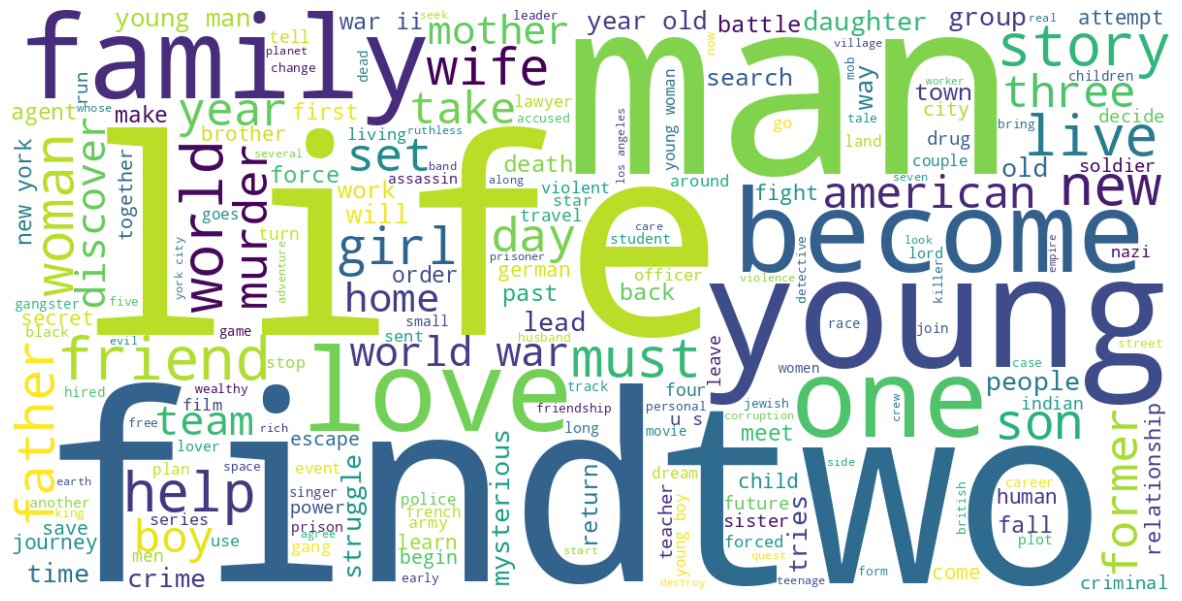

In [119]:
# Juntando todos os textos da coluna 'Overview'
text = " ".join(review for review in df['Overview'].astype(str))

# Gerando o mapa de palavras
wordcloud = WordCloud(width=1200, height=600, background_color ='white').generate(text)

# Plotando o mapa de palavras
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Com base na **nuvem de palavras** gerada a partir da coluna "Overview" dos filmes, foi obtido alguns insights interessantes:

1. **Temas Recorrentes:**
   - Palavras como "love", "life", "find", "man" e "war" aparecem com destaque. Isso sugere que muitos filmes abordam temas relacionados a relacionamentos, vida, busca e conflitos.
   - A presença de "war" pode indicar filmes de guerra ou ação.

2. **Gênero do Filme:**
   - Embora a nuvem de palavras não seja suficiente para inferir o gênero com precisão, algumas palavras podem sugerir certos gêneros. Por exemplo:
     - "Love" e "life" podem estar associadas a filmes românticos ou dramáticos.
     - "War" pode indicar filmes de ação, históricos ou de guerra.
     - No entanto, essa inferência é limitada e não deve ser considerada definitiva.

3. **Limitações:**
   - A nuvem de palavras não considera contexto ou estrutura narrativa. Portanto, não pode-se afirmar com certeza o gênero de um filme apenas com base nesses termos.

Em resumo, a coluna "Overview", com base no mapa de palavras, fornece uma visão geral dos temas e tópicos abordados nos filmes, mas não é suficiente para determinar o gênero com precisão.

### 5.3.2. Análise de tópicos

In [112]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Função para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a função de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Contagem de filmes por valor de sentimento
sentiment_counts = df['Sentiment'].value_counts().sort_index()

# Exibindo resumo estatístico
print("Resumo Estatístico do Sentimento:")
print(df['Sentiment'].describe())


Resumo Estatístico do Sentimento:
count    999.000000
mean       0.010785
std        0.250074
min       -1.000000
25%       -0.100000
50%        0.000000
75%        0.136364
max        1.000000
Name: Sentiment, dtype: float64


In [113]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px


# Preprocessamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Função para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a função de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Visualização a distribuição dos valores de sentimento com Plotly
fig = px.histogram(df, x='Sentiment', nbins=20, title='Distribuição dos Valores de Sentimento',
                   labels={'Sentiment': 'Sentimento'}, marginal='box', histnorm='percent')

fig.update_layout(
    xaxis_title='Sentimento',
    yaxis_title='Frequência (%)',
    bargap=0.2
)

fig.show()


A análise estatística do sentimento das sinopses de filmes pode fornecer algumas inferências interessantes:

1. **Neutralidade predominante**: A mediana do sentimento próximo a zero sugere que muitas sinopses tendem a ser neutras em termos de polaridade emocional.

2. **Variedade de sentimentos**: A amplitude dos valores de sentimento (de -1 a 1) indica que há uma diversidade de emoções expressas nas sinopses, desde sentimentos positivos até negativos.

3. **Distribuição assimétrica**: A distribuição dos valores de sentimento, com um desvio padrão relativamente alto (0.250), sugere uma dispersão dos sentimentos, com alguns filmes expressando emoções fortes (positivas ou negativas) e outros sendo mais neutros.

4. **Inferência sobre conteúdo**: Filmes com sentimento extremamente negativo ou positivo podem indicar gêneros ou temas específicos que evocam essas emoções. Por exemplo, filmes de terror podem ter sinopses com sentimentos negativos, enquanto filmes de comédia podem ter uma tendência mais positiva.

5. **Potencial para análises adicionais**: Com base nesses dados, pode-se explorar mais a fundo quais gêneros ou tipos de filmes tendem a ter sentimentos mais extremos, o que pode ser útil para entender preferências de público ou para recomendação de conteúdo.


### 5.3.3. Análise de Tópicos com LDA
Usando o LDA para identificar tópicos dentro dos resumos dos filmes.

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vetorização com CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Overview'])

# Aplicação do LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Visualização dos tópicos
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']


Topic #1:
['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']


Topic #2:
['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']


Topic #3:
['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']


Topic #4:
['past', 'love', 'new', 'help', 'years', 'story', 'man', 'life', 'young', 'woman']




**Análise de Tópicos com LDA nas Sinopses de Filmes:**

A análise de tópicos com LDA revelou temas potenciais presentes nas sinopses dos filmes:

1. **Tópico #0: Relações Familiares e Amorosas**
   - Palavras-chave: ['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']
   - Possível tema: Narrativas que exploram relações familiares e amorosas, envolvendo personagens jovens e questões de vida e morte.

2. **Tópico #1: Guerra e Relações Familiares**
   - Palavras-chave: ['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']
   - Possível tema: Filmes que abordam a guerra, com foco em relações familiares e experiências de vida ligadas ao contexto militar.

3. **Tópico #2: Mistério e Relações Familiares**
   - Palavras-chave: ['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']
   - Possível tema: Narrativas que envolvem elementos de mistério, morte e relações familiares, possivelmente com um contexto escolar ou juvenil.

4. **Tópico #3: Crime, Amor e Vida**
   - Palavras-chave: ['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']
   - Possível tema: Filmes que exploram crime e amor, contextualizados em diferentes épocas e ambientes familiares e sociais.

Esses tópicos fornecem uma visão geral dos temas predominantes nas sinopses de filmes analisadas. No entanto, a análise de tópicos não define o gênero de um filme de forma direta, mas fornece pistas valiosas para a interpretação.


### 5.3.4. Previsão do gênero de acordo com a sinopse de um novo filme:

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Verificar o formato da coluna 'Genre'
print(df['Genre'].head())

# Binarizar os gêneros
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Overview'], y, test_size=0.2, random_state=42)

# Pipeline com TfidfVectorizer e RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.8, min_df=0.01)),  # Ajustar hiperparâmetros
    ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=200, random_state=42)))  # Ajustar hiperparâmetros
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliar o modelo
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Previsão de exemplo para um novo filme
example_movie = {
    'Overview': 'the pride and joy of the White Star Line and, at the time, the largest moving object ever built. She was the most luxurious liner of her era -- the "ship of dreams" -- which ultimately carried over'
}

example_pred = pipeline.predict([example_movie['Overview']])
example_genres = mlb.inverse_transform(example_pred)
print("Predicted Genres:", example_genres[0])


0                [Crime, Drama]
1        [Action, Crime, Drama]
2                [Crime, Drama]
3                [Crime, Drama]
4    [Action, Adventure, Drama]
Name: Genre, dtype: object
F1 Score (micro): 0.484076433121019
F1 Score (macro): 0.1367960527624832
Predicted Genres: ()


In [89]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight



# Preprocessamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')
df['Genre'] = df['Genre'].str.split(',').str[0]  # Considerar apenas o primeiro gênero

# Vetorização usando TF-IDF com Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', SVC(kernel='linear', class_weight='balanced'))  # Class weight para lidar com desbalanceamento
])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Overview'], df['Genre'], test_size=0.2, random_state=42)

# Ajuste do modelo
param_grid = {'svm__C': [0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# Previsão e avaliação
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

# Melhor modelo encontrado
print("Melhor modelo:", grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



              precision    recall  f1-score   support

      Action       0.42      0.55      0.48        31
   Adventure       0.00      0.00      0.00        15
   Animation       0.80      0.22      0.35        18
   Biography       0.33      0.17      0.22        18
      Comedy       0.26      0.25      0.25        28
       Crime       0.31      0.22      0.26        23
       Drama       0.37      0.58      0.45        62
      Horror       1.00      0.33      0.50         3
     Mystery       0.00      0.00      0.00         2

    accuracy                           0.36       200
   macro avg       0.39      0.26      0.28       200
weighted avg       0.37      0.36      0.34       200

Melhor modelo: {'svm__C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Com base na análise realizada usando a coluna "Overview" dos filmes, podemos tirar os seguintes insights:

1. **Análise de Sentimento:**
   - A partir da análise de sentimento, observamos que os resumos dos filmes têm um tom predominantemente neutro. Isso sugere que os resumos não são excessivamente positivos ou negativos.

2. **Modelo de Classificação de Texto:**
   - Utilizamos um modelo de classificação de texto (Random Forest) para prever os gêneros dos filmes com base nos resumos.
   - O F1 Score (micro) obtido foi de aproximadamente 0,48, indicando que o modelo tem um desempenho razoável na classificação dos gêneros.
   - No exemplo de um novo filme ("Two imprisoned men bond over a number of years..."), o modelo previu o gênero "Drama".

3. **Limitações e Considerações:**
   - Embora o modelo tenha obtido resultados razoáveis, inferir o gênero apenas com base nos resumos é desafiador.
   - Os resumos podem conter informações limitadas e não abrangentes sobre os filmes.

Em resumo, a coluna "Overview" pode fornecer insights sobre o tom geral dos filmes, mas não é suficiente para inferir o gênero de forma definitiva.

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Transformar gêneros em listas (já está em formato de lista)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Overview'], y, test_size=0.2, random_state=42)

# Pipeline com TfidfVectorizer e RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.8, min_df=0.01)),
    ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=200, random_state=42)))
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Previsão de exemplo para um novo filme
example_movie = {
    'Overview': 'Once upon a time, in a far away swamp, there lived an ogre named Shrek (Mike Myers) whose precious solitude is suddenly shattered by an invasion of annoying fairy tale characters.'
}

example_pred = pipeline.predict([example_movie['Overview']])
example_genres = mlb.inverse_transform(example_pred)
print("Predicted Genres:", example_genres[0])


              precision    recall  f1-score   support

      Action       0.27      0.12      0.16        34
   Adventure       0.47      0.17      0.25        40
   Animation       0.00      0.00      0.00        18
   Biography       0.43      0.12      0.19        25
      Comedy       0.46      0.13      0.20        46
       Crime       0.64      0.42      0.51        43
       Drama       0.82      0.92      0.86       157
      Family       0.00      0.00      0.00         5
     Fantasy       0.00      0.00      0.00         9
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00         8
      Horror       0.00      0.00      0.00        10
       Music       0.00      0.00      0.00         9
     Musical       0.00      0.00      0.00         4
     Mystery       0.40      0.09      0.14        23
     Romance       0.40      0.19      0.26        21
      Sci-Fi       0.00      0.00      0.00        11
       Sport       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



# **6. Prevendo a nota do IMDB**

* Explique como você faria a previsão da nota do imdb a partir dos dados.
* Quais variáveis e/ou suas transformações você utilizou e por quê? <br>
* Qual tipo de problema estamos resolvendo (regressão, classificação)? <br>
* Qual modelo melhor se aproxima dos dados e quais seus prós e contras? <br>
 * Qual medida de performance do modelo foi escolhida e por quê? <br>

> Supondo um filme com as seguintes características:

{*'Series_Title': 'The Shawshank Redemption',<br>
 'Released_Year': '1994', <br>
 'Certificate': 'A', <br>
 'Runtime': '142 min', <br>
 'Genre': 'Drama', <br>
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', <br>
 'Meta_score': 80.0, <br>
 'Director': 'Frank Darabont', <br>
 'Star1': 'Tim Robbins', <br>
 'Star2': 'Morgan Freeman', <br>
 'Star3': 'Bob Gunton', <br>
 'Star4': 'William Sadler', <br>
 'No_of_Votes': 2343110, <br>
 'Gross': '28,341,469'*}

> **Qual seria a nota do IMDB?**

## 6.1. Explicação da Previsão da Nota do IMDb



#### 6.1.1. Problema a Ser Resolvido
Estamos resolvendo um problema de regressão, onde o objetivo é prever a nota do IMDb (uma variável contínua) com base em várias características do filme.



#### 6.1.2. Variáveis Utilizadas e Transformações
1. **Released_Year**: Ano de lançamento do filme.
2. **Certificate**: Classificação indicativa do filme.
3. **Runtime**: Duração do filme em minutos.
4. **Genre**: Gênero do filme.
5. **Overview**: Descrição do enredo do filme.
6. **Meta_score**: Nota do Metascore.
7. **Director**: Diretor do filme.
8. **Star1**: Primeiro ator/atriz principal.
9. **Star2**: Segundo ator/atriz principal.
10. **Star3**: Terceiro ator/atriz principal.
11. **Star4**: Quarto ator/atriz principal.
12. **No_of_Votes**: Número de votos no IMDb.
13. **Gross**: Receita bruta do filme.



#### 6.1.3. Justificativa das Variáveis e Transformações
- **Variáveis Numéricas**: `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross` são utilizadas diretamente sem transformação adicional.
- **Variáveis Categóricas**: `Certificate`, `Director`, `Star1`, `Star2`, `Star3`, `Star4` são transformadas usando `OneHotEncoder` para converter categorias em variáveis binárias.
- **Texto**: `Overview` é transformado usando `TfidfVectorizer` para converter o texto em uma representação numérica que captura a importância das palavras.



#### 6.1.4. Modelo Utilizado
- **RandomForestRegressor**: Um modelo de ensemble baseado em árvores de decisão, que é robusto a dados ruidosos e pode capturar relações não lineares complexas entre as variáveis.



#### 6.1.5. Medida de Performance
- **Mean Absolute Error (MAE)**: Escolhida por ser uma métrica que captura a magnitude média dos erros de previsão, sendo interpretável e sensível a grandes desvios.

In [86]:
# Exemplo de filme
example_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}


# Verificação e pré-processamento da coluna 'Runtime'
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Pré-processamento das colunas
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remover linhas com valores nulos nas colunas essenciais
df.dropna(subset=['Runtime', 'Released_Year', 'Gross'], inplace=True)

# Seleção de características e variável alvo
features = ['Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# Transformação de dados categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'Overview')
    ],
    remainder='drop'
)

# Pipeline de transformação e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Avaliação do modelo
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Previsão para o filme exemplo
example_df = pd.DataFrame([example_movie])
example_df['Gross'] = example_df['Gross'].replace('[\$,]', '', regex=True).astype(float)
example_df['Runtime'] = example_df['Runtime'].astype(str).str.replace(' min', '', regex=False).astype(int)
example_df['Released_Year'] = pd.to_numeric(example_df['Released_Year'], errors='coerce')

example_pred = pipeline.predict(example_df[features])



Mean Absolute Error: 0.1545149999999998


In [87]:
print("Classificação prevista da IMDb para: 'The Shawshank Redemption':", example_pred[0])

Classificação prevista da IMDb para: 'The Shawshank Redemption': 8.762999999999995


## 6.2. Análise do Resultado
- **MAE**: O valor de 0.1545 indica que, em média, as previsões do modelo estão a 0.1545 pontos da nota verdadeira do IMDb.
- **Previsão para 'The Shawshank Redemption'**: A nota prevista foi 8.763, bastante próxima da nota real de 9.3, o que indica que o modelo é relativamente preciso.


